<a href="https://colab.research.google.com/github/AlirezaSalehy/AlirezaSalehy/blob/main/Copy_of_ContrastiveVisionLangModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook i try to evaluate CLIP like model especially with resepect to their text representation abililty.

In [1]:
# uncomment this to install
!pip install --quiet sentence-transformers
!pip install --quiet kaggle
!pip install --quiet datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00


In [2]:
import os
import glob
from google.colab import files

import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from datasets import Dataset
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

In [ ]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Dataset (Flicker 8k)

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

In [ ]:
!unzip -q \flickr8k.zip -d \flickr8k

In [ ]:
data_path = "flickr8k/"

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:03<00:00, 41.5MB/s]
100% 2.29G/2.29G [01:03<00:00, 38.9MB/s]


In [ ]:
!unzip -q \chest-xray-pneumonia.zip -d \chest-xray-pneumonia

replace chest-xray-pneumonia/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [ ]:
!ls chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg

chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg


In [10]:
def get_imgs(path):
  img_names = list(glob.glob(f'{data_path}Images/*.jpg'))
  img_lst = [Image.open(filepath) for filepath in img_names]
  print("Images:", len(img_names))
  return img_lst, img_names

def plot_images(images, query, n_row=2, n_col=2):
  _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
  axs = axs.flatten()
  for img, ax in zip(images, axs):
      ax.set_title(query)
      ax.set_xticks([])
      ax.set_yticks([])
      ax.imshow(img)
  plt.show()

def random_images(dataset, num_imgs=4):
  img_list = []
  for _ in range(num_imgs):
    spl_idx = random.randint(0, len(dataset)-1)
    img = dataset[spl_idx]
    img_list.append(img[0])
  return img_list

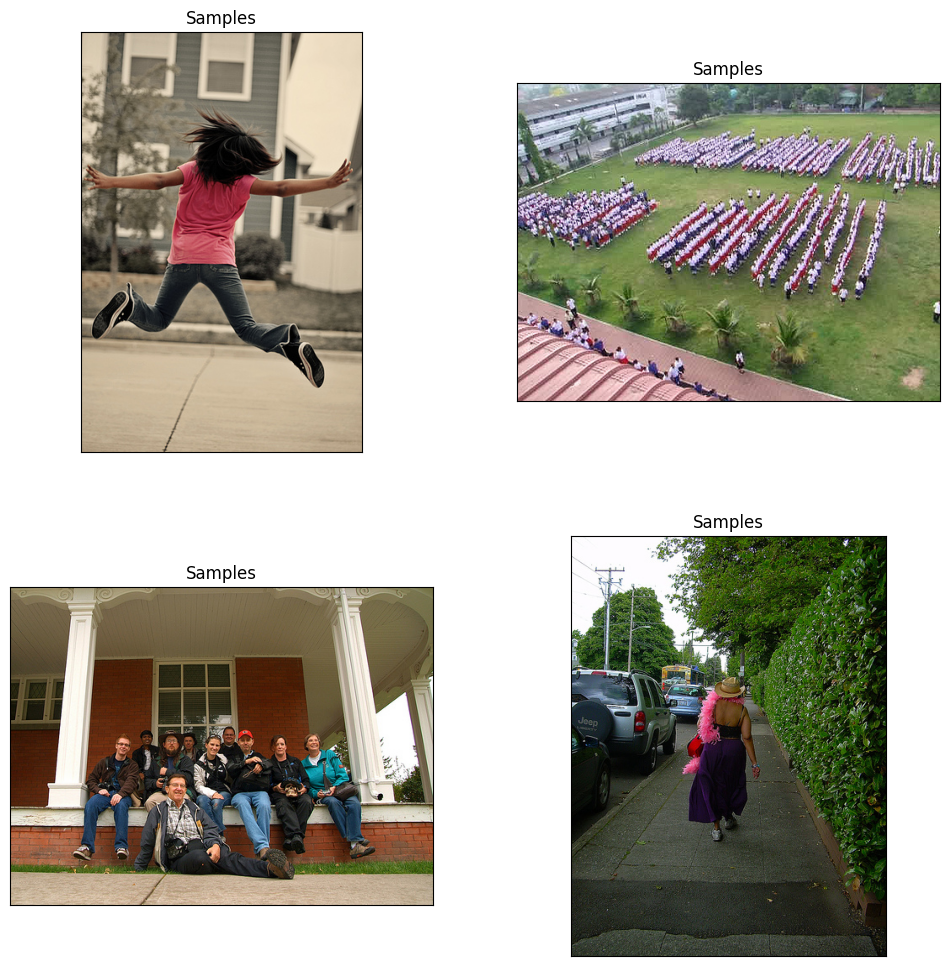

In [11]:
images_dataset = ImageFolder(root=data_path)
imgs = random_images(images_dataset, 4)
plot_images(imgs, 'Samples')

# Retrieval

In [13]:
# imgs, pths = get_imgs(data_path)
# hf_dataset = Dataset.from_dict({"image": pths}).cast_column("image", Image())

dataset = load_dataset("imagefolder", data_dir=data_path)

Resolving data files:   0%|          | 0/8092 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [22]:
batch_size = 256
def add_embeddings(example):
  img_embds = clip.encode(example['image'], batch_size=batch_size,
                           convert_to_tensor=True, show_progress_bar=True)
  return {'img_emb': img_embds}

def encode_cache(hg_ds, model, dataset, batch_size = 128):
  ldr = DataLoader(dataset, batch_size=batch_size, shuffle=False)
  # for imgs, _ in ldr:
    # embs =

def get_similars(img_emb, txt_emb, k):
  pass

def retrive_top(model, dataset, k=5):
  pass

In [23]:
dataset.map(add_embeddings, batched=True, batch_size=batch_size,
            keep_in_memory=False, writer_batch_size=batch_size)

Map:   0%|          | 0/8091 [00:00<?, ? examples/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [48]:
emb_ds = Dataset()
emb_ds.co

# CLIP

In [21]:
## Image encoder
clip = SentenceTransformer('clip-ViT-B-32')
# clip_img_emb = clip.encode(img_lst, batch_size=128, convert_to_tensor=True, show_progress_bar=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Next, we define a search function.
def search(query, text_encoder, k=4):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = text_encoder.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    # hits, dists = util.semantic_search(query_emb[0], img_emb, top_k=k)[0]
    tops = util.semantic_search(query_emb[0], img_emb, top_k=k)[0]

    matched_images = []
    for top in tops:
        matched_images.append(Image.open(img_names[top['corpus_id']]))

    plot_images(matched_images, query)
    #print(matched_images)

1


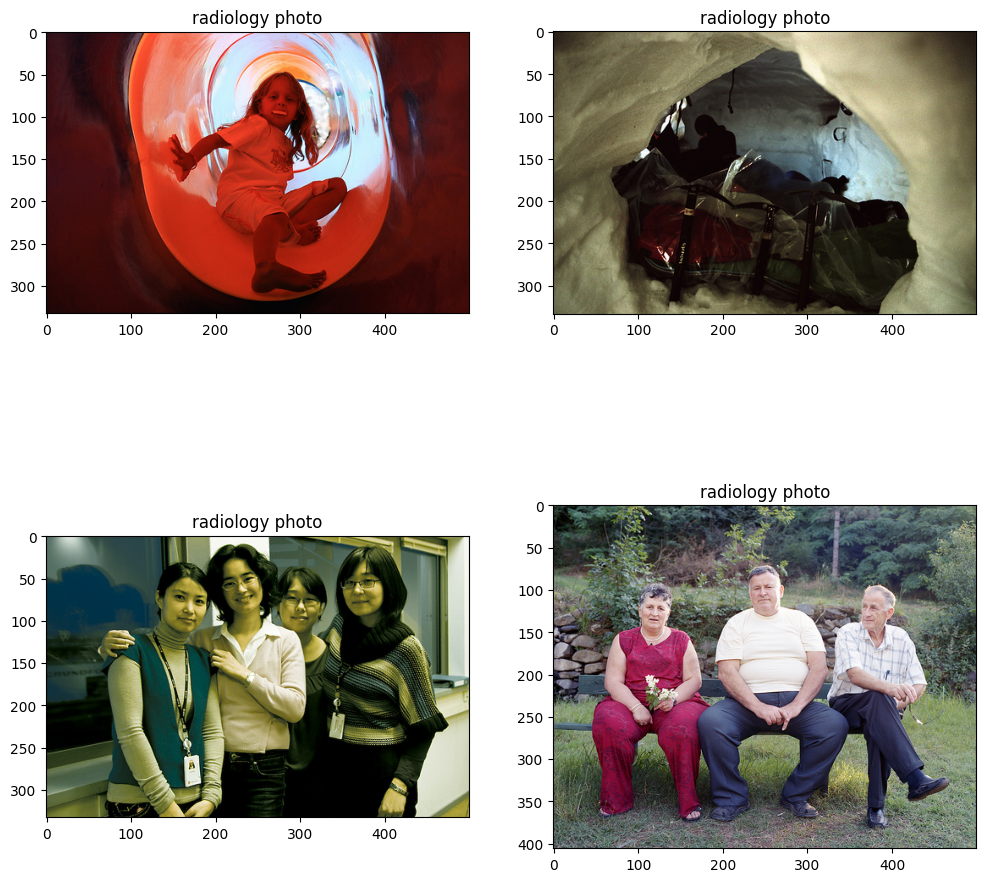

In [ ]:
search("radiology photo", clip_model)

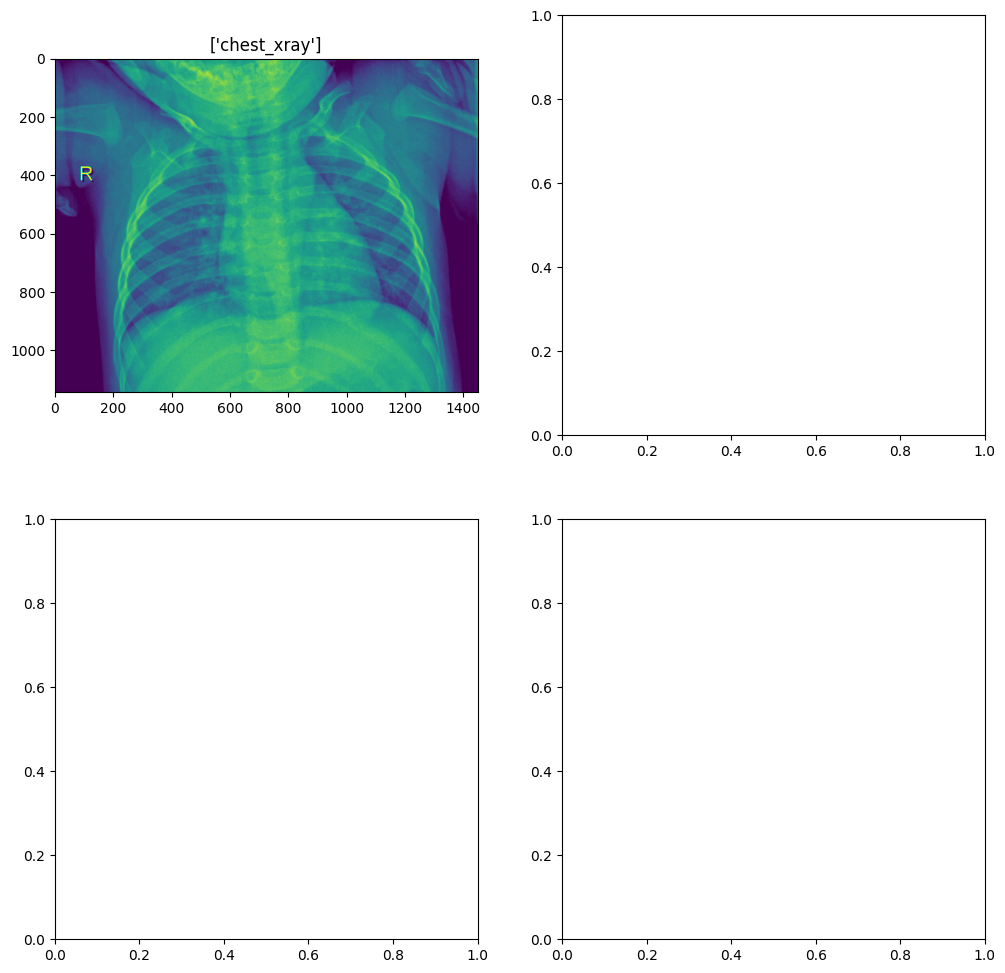

In [ ]:
xray_chest_path = 'chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg'
img = Image.open(xray_chest_path)
plot_images([img], ['chest_xray'])

In [ ]:
import torch
from torch.nn.functional import cosine_similarity

xray_queries = ['radiology image', 'color', 'cat', 'photo', 'brain mri']
xray_emb = img_model.encode(img, convert_to_tensor=True, show_progress_bar=False).reshape(1, -1)
for i, prmpt in enumerate(xray_queries):
  pmpt_emb = clip_model.encode(sentences=[prmpt], convert_to_tensor=True, show_progress_bar=False)
  print(cosine_similarity(pmpt_emb, xray_emb))

tensor([0.3064], device='cuda:0')
tensor([0.1942], device='cuda:0')
tensor([0.2046], device='cuda:0')
tensor([0.2150], device='cuda:0')
tensor([0.2085], device='cuda:0')


In [ ]:
import torch
from torch.nn.functional import cosine_similarity

xray_queries = ['radiology image', 'color', 'cat', 'photo', 'brain mri']
xray_emb = img_model.encode(img, convert_to_tensor=True, show_progress_bar=False).reshape(1, -1)
for i, prmpt in enumerate(xray_queries):
  pmpt_emb = clip_model.encode(sentences=[prmpt], convert_to_tensor=True, show_progress_bar=False)
  print(cosine_similarity(pmpt_emb, xray_emb))

tensor([0.3064], device='cuda:0')
tensor([0.1942], device='cuda:0')
tensor([0.2046], device='cuda:0')
tensor([0.2150], device='cuda:0')
tensor([0.2085], device='cuda:0')


# ALIGN

In [ ]:
import requests
import torch
from PIL import Image
from transformers import AlignProcessor, AlignModel

device = 'cpu' if not torch.cuda.is_available() else 'cuda'
processor = AlignProcessor.from_pretrained("kakaobrain/align-base")
model = AlignModel.from_pretrained("kakaobrain/align-base").to(device)

candidate_labels = ["an image of a cat", "an image of a dog"]

inputs = processor(text=candidate_labels, images=img_lst[:200], return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
with torch.no_grad():
  for key in inputs.keys():
    inputs[key] = inputs[key].to(device)
  outputs = model(**inputs)

# this is the image-text similarity score
logits_per_image = outputs.logits_per_image

# we can take the softmax to get the label probabilities
probs = logits_per_image.softmax(dim=1)

In [ ]:
cats = probs[:, 0].topk(k=4, dim=0)
dogs = probs[:, 1].topk(k=4, dim=0)

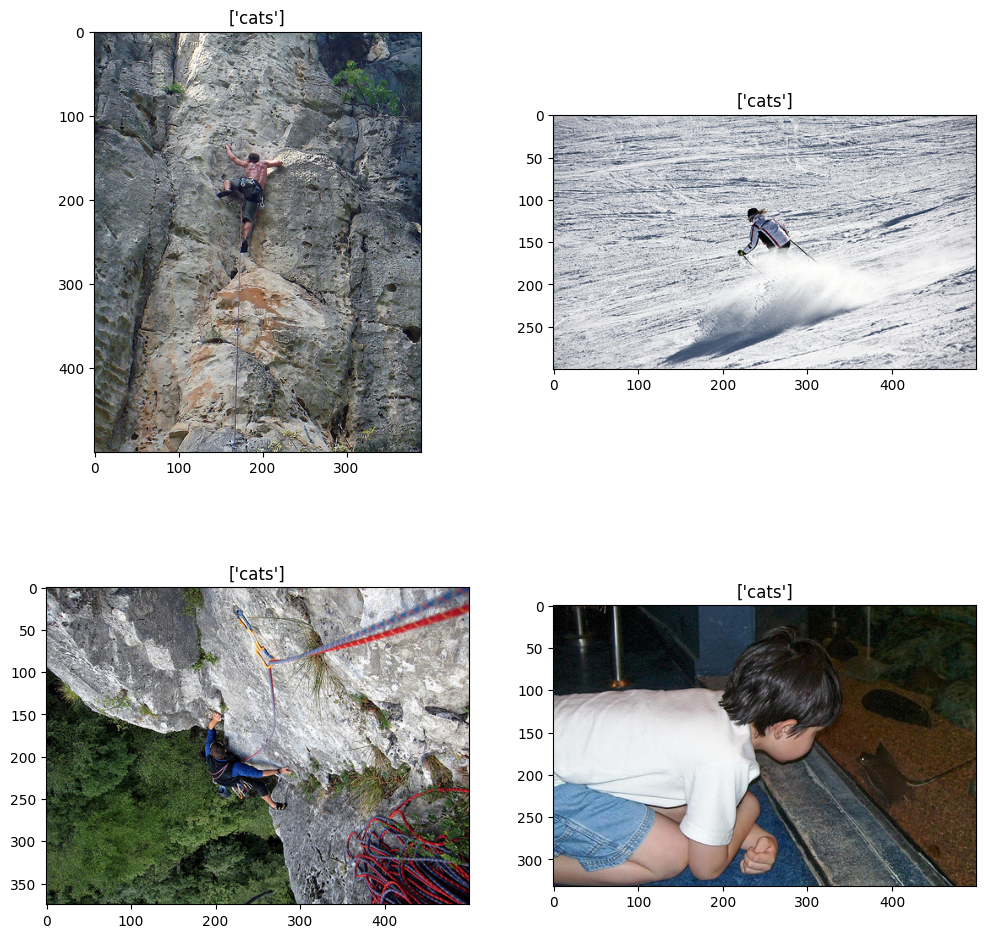

In [ ]:
imgs = [img_lst[indx] for indx in cats.indices]
plot_images(imgs, ['cats'])

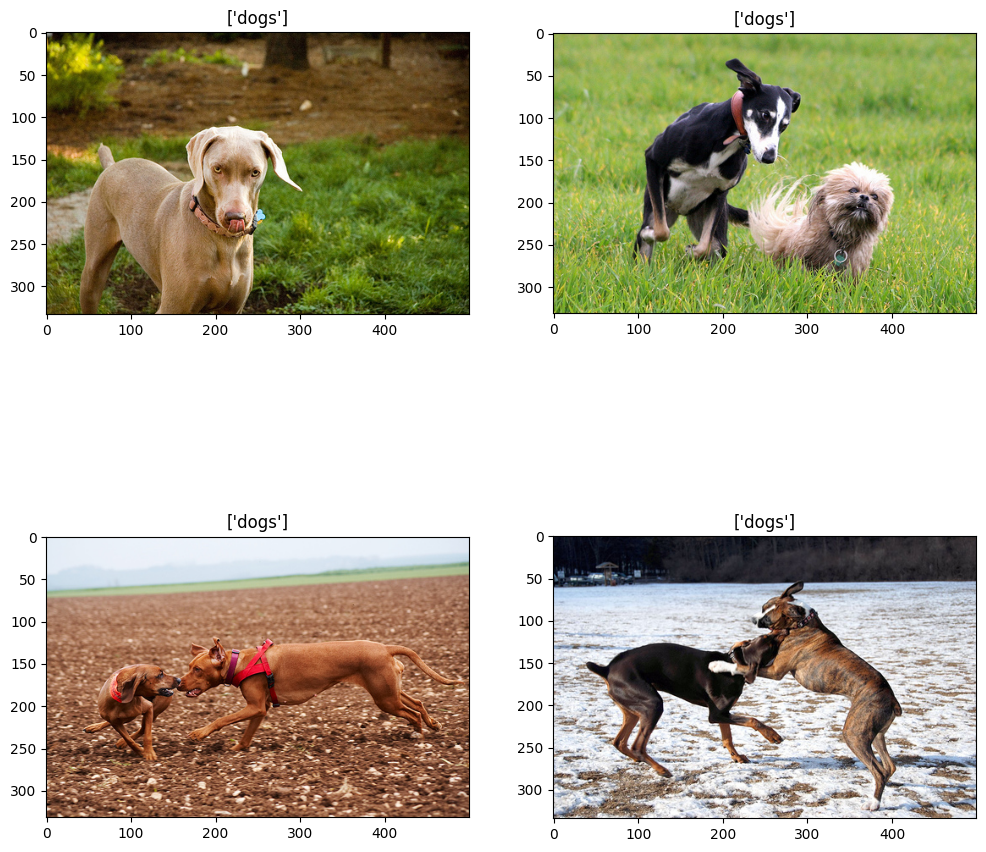

In [ ]:
imgs = [img_lst[indx] for indx in dogs.indices]
plot_images(imgs, ['dogs'])